# Classification

Identifying a grouping technique for a given dataset by depending on a value of the target or output attribute, the entire dataset can be qualified to belong to a class. It helps in identifying the data behavior patterns. 

In short, classification is a discrimination mechanism based on the values of the dataset.

Classification is the task of choosing the correct class label for a given input. In basic classification tasks, each input is considered in isolation from all other inputs, and the set of labels is defined in advance. Some examples of classification tasks are:

- classification of fruits based on quality
- Spam classification
- Face Identification, etc

The basic classification task has a number of interesting variants. For example, in multi-class classification, each instance may be assigned multiple labels; in open-class classification, the set of labels is not defined in advance; and in sequence classification, a list of inputs are jointly classified.

A classifier is called supervised if it is built based on training corpora containing the correct label for each input. The framework used by supervised classification is shown in 

![](files/supervised_classification_classifiction.jpeg)

It is similar to regression. 

### Labeled Data

What constitutes a label, or a class, is entirely dependent upon the question being asked. Consider this data about survivors of the Titanic:

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import datasets

In [3]:
data = pd.read_csv("files/titanic_data.csv")
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


If my question were “Who lived and who died on the Titanic?” then clearly the class would be “Survived”, and I would write an algorithm that most efficiently predicted survival. However, if my question had been, “What’s the best determinant of where a passenger embarked from?” my classes would be entirely different and would pull from the “Embarked” column.

When writing your own machine learning algorithms, you can tailor them to interpret along the classes given in your data. This means your classes can be “1, 2, 3” or “A, B, C” or “fruit, vegetable, meat”, or whatever. However, if you were to use the algorithms present in Python’s scikit-learn package for Data Science and Machine Learning, you’d have to translate the classes to numerical information.

In [4]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Most common Supervised Classification

- Regression algorithms
- Support Vector Machines
- K-Nearest Neighbors

- Gaussian Processes
- Neural Networks
- Naive Bayes
- Decision Trees

## Linear Classifiers

- Linear Classifiers
    - Logical Regression
    - Naïve Bayes Classifier
    - Perceptron
    - Support Vector Machine
- Quadratic Classifiers
- K-Means Clustering
- Boosting
- Decision Tree
    - Random Forest
- Neural networks
- Bayesian Networks 

## Regression algorithms

## K-Nearest Neighbors

The simplest possible classifier is the nearest neighbor: given a new observation X_test, find in the training set (i.e. the data used to train the estimator) the observation with the closest feature vector. (Please see the Nearest Neighbors section of the online Scikit-learn documentation for more information about this type of classifier.)

It is the simplest of classification model's. The way it works is, when a new observation is provided it take the label of the training samples closest to it in n-dimensional space, where n is the number of features in each sample.

The k-nearest neighbors classifier internally uses an algorithm based on ball trees to represent the samples it
is trained on.

In [5]:
# Loading datasets from sklearn

from sklearn import datasets
import numpy as np
%matplotlib inline

In [6]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

In [9]:
print(dir(iris))

['DESCR', 'data', 'feature_names', 'target', 'target_names']


In [12]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [14]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
print(len(iris_X_train))
print(len(iris_X_test))

140
10


In [15]:

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 
print(knn.predict(iris_X_test))
print(iris_y_test)

[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


Automatically created module for IPython interactive environment


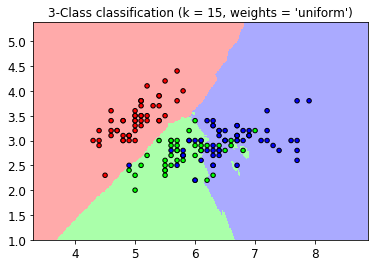

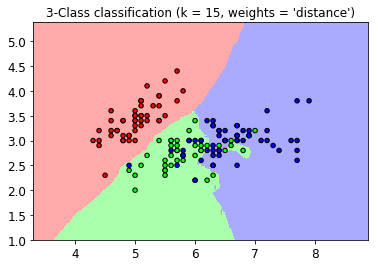

In [16]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

#### Application to Image Compression

Clustering can be seen as a way of choosing a small number of observations from the information. For
instance, this can be used to posterize an image (conversion of a continuous gradation of tone to several
regions of fewer tones):

In [103]:
from scipy import misc
import scipy 

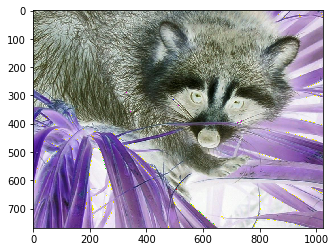

In [106]:
face = misc.face().astype(np.float32)
plt.imshow(face)

In [105]:
X = face.reshape((-1, 1)) 
k_means = cluster.KMeans(n_clusters=5)
k_means.fit(X)

values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

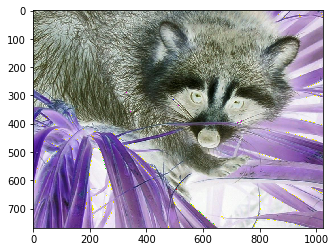

In [32]:
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape
plt.imshow(face, cmap=plt.cm.gray)

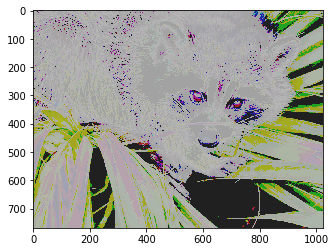

In [33]:
import matplotlib.pyplot as plt

img = plt.imshow(face_compressed, cmap=plt.cm.gray)

### The curse of dimensionality

For an estimator to be effective, you need the distance between neighboring points to be less than some value d, which depends on the problem. In one dimension, this requires on average n ~ 1/d points. In the context of the above k-NN example, if the data is described by just one feature with values ranging from 0 to 1 and with n training observations, then new data will be no further away than 1/n. Therefore, the nearest neighbor decision rule will be efficient as soon as 1/n is small compared to the scale of between-class feature variations.

If the number of features is p, you now require n \sim 1/d^p points. Let’s say that we require 10 points in one dimension: now 10^p points are required in p dimensions to pave the [0, 1] space. As p becomes large, the number of training points required for a good estimator grows exponentially.

For example, if each point is just a single number (8 bytes), then an effective k-NN estimator in a paltry p \sim 20 dimensions would require more training data than the current estimated size of the entire internet (±1000 Exabytes or so).

This is called the curse of dimensionality and is a core problem that machine learning addresses.

## Clustering: grouping observations together

### Dimension Reduction with Principal Component Analysis

The cloud of points spanned by the observations above is very flat in one direction, so that one feature can
almost be exactly computed using the 2 other. PCA finds the directions in which the data is not flat and it can
reduce the dimensionality of the data by projecting on a subspace.

In [6]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)

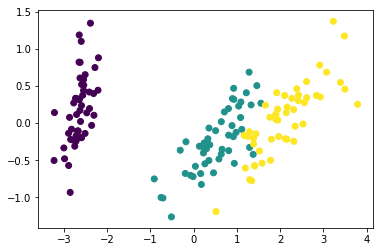

In [7]:
import pylab as pl
pl.scatter(X[:, 0], X[:, 1], c=iris.target)

#### Putting it all together: face recognition

In [22]:
import numpy as np
import pylab as pl
from sklearn.model_selection import StratifiedKFold
from sklearn import  datasets, decomposition, svm
# ..
# .. load data ..
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)
perm = np.random.permutation(lfw_people.target.size)
lfw_people.data = lfw_people.data[perm]
lfw_people.target = lfw_people.target[perm]
faces = np.reshape(lfw_people.data, (lfw_people.target.shape[0], -1))
# train, test = 
skf = StratifiedKFold(n_splits=2, random_state=True, shuffle=True)
print(skf)
skf.get_n_splits(lfw_people.data, lfw_people.target)
for train_index, test_index in skf.split(lfw_people.data, lfw_people.target ):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=2, random_state=True, shuffle=True)
TRAIN: [   0    2    3    5    7    8   11   12   13   15   16   19   21   25   26
   29   30   33   35   36   38   39   41   43   44   45   46   48   51   54
   55   58   59   66   67   69   72   73   74   76   78   79   81   83   84
   85   86   87   88   89   90   91   92   93   95   99  101  103  104  107
  108  109  110  111  113  114  115  116  118  119  120  121  122  123  124
  125  128  129  130  132  133  136  137  139  141  143  144  145  146  147
  148  149  150  156  158  160  161  163  166  167  168  170  173  179  180
  182  183  184  185  186  188  189  192  195  197  199  202  203  207  208
  209  212  213  214  217  218  219  220  221  223  228  231  232  235  237
  238  241  242  244  245  246  248  249  250  251  252  254  255  257  259
  260  262  263  264  267  268  271  273  274  275  279  280  281  288  289
  291  295  296  298  299  304  305  306  307  308  309  310  311  313  314
  316  319  321  322

NameError: name 'y' is not defined

In [23]:

# train, test = iter(StratifiedKFold(n_splits=2, random_state=True, shuffle=True).get_n_splits).next()
# X_train, X_test = faces[train], faces[test]
# y_train, y_test = lfw_people.target[train], lfw_people.target[test]
# ..
# .. dimension reduction ..
pca = decomposition.RandomizedPCA(n_components=150, whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
# ..
# .. classification ..
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)



/home/mayank/.local/lib64/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


NameError: name 'y_train' is not defined

In [7]:

# .. predict on new images ..
for i in range(10):
    print(lfw_people.target_names[clf.predict(X_test_pca[i])[0]])
    _ = pl.imshow(X_test[i].reshape(50, 37), cmap=pl.cm.gray)
    _ = raw_input()

NameError: name 'lfw_people' is not defined

- Linear Classifiers
    - Logical Regression
    - Naïve Bayes Classifier
    - Perceptron
    - Support Vector Machine
- Quadratic Classifiers
- K-Means Clustering
- Boosting
- Decision Tree
    - Random Forest
- Neural networks
- Bayesian Networks 

### Logical Regression


Plot classification probability
Plot the classification probability for different classifiers. We use a 3
class dataset, and we classify it with a Support Vector classifier, L1
and L2 penalized logistic regression with either a One-Vs-Rest or multinomial
setting, and Gaussian process classification.
The logistic regression is not a multiclass classifier out of the box. As
a result it can identify only the first class.

classif_rate for L1 logistic : 79.333333 
classif_rate for L2 logistic (OvR) : 76.666667 
classif_rate for Linear SVC : 82.000000 
classif_rate for L2 logistic (Multinomial) : 82.000000 
classif_rate for GPC : 82.666667 


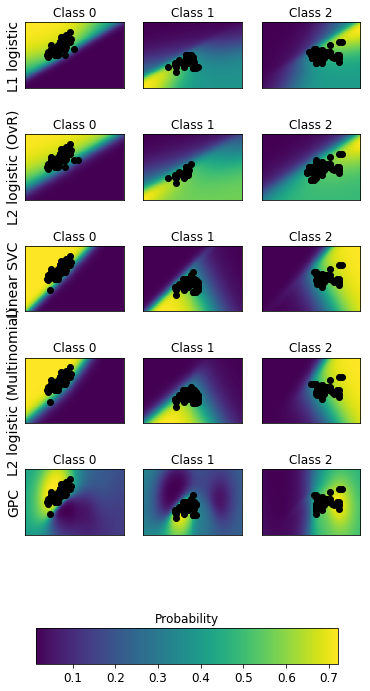

In [17]:
"""
===============================
Plot classification probability
===============================
Plot the classification probability for different classifiers. We use a 3
class dataset, and we classify it with a Support Vector classifier, L1
and L2 penalized logistic regression with either a One-Vs-Rest or multinomial
setting, and Gaussian process classification.
The logistic regression is not a multiclass classifier out of the box. As
a result it can identify only the first class.
"""
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features for visualization
y = iris.target

n_features = X.shape[1]

C = 1.0
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers. The logistic regression cannot do
# multiclass out of the box.
classifiers = {'L1 logistic': LogisticRegression(C=C, penalty='l1'),
               'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2'),
               'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                                 random_state=0),
               'L2 logistic (Multinomial)': LogisticRegression(
                C=C, solver='lbfgs', multi_class='multinomial'),
               'GPC': GaussianProcessClassifier(kernel)
               }

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    classif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
    print("classif_rate for %s : %f " % (name, classif_rate))

    # View probabilities=
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()


Classifier comparison
A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.
Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.
The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.



/home/mayank/.local/lib64/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mayank/.local/lib64/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mayank/.local/lib64/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


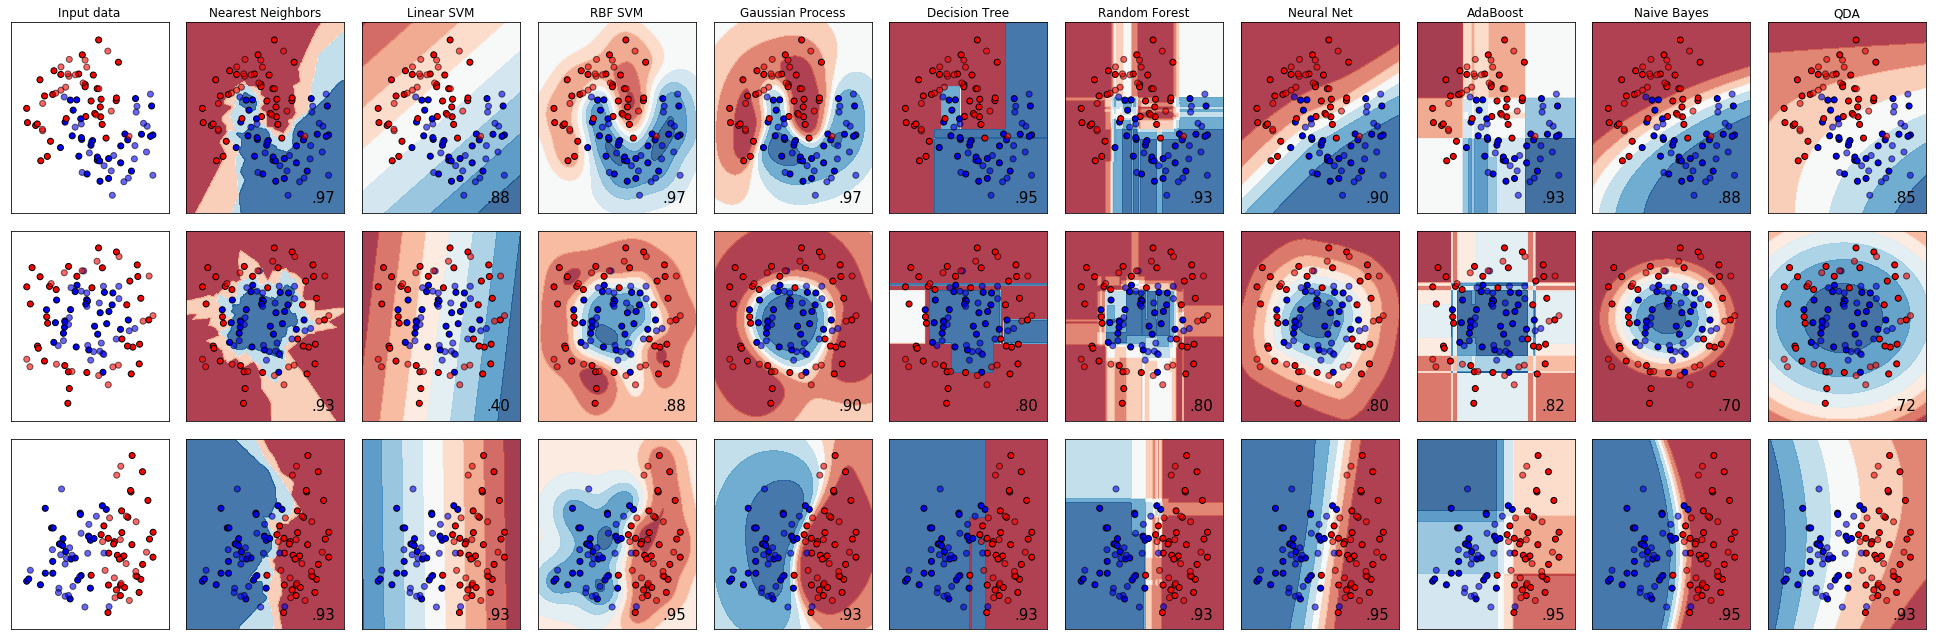

In [35]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
# URL: https://github.com/scikit-learn/scikit-learn/blob/master/examples/classification/plot_classifier_comparison.py
"""
=====================
Classifier comparison
=====================
A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.
Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.
The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.
"""
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## Reference:
    1. Dataset: 
        - http://archive.ics.uci.edu/ml/index.php
        - https://github.com/myrobeandwizardhat/DataSet_Survivors
    2. Tutorials
        - https://codefellows.github.io/sea-python-401d6/lectures/supervised_classification.html
        - http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html
        - http://www.scipy-lectures.org/packages/scikit-learn/index.html
        - http://bugra.github.io/work/notes/2014-11-22/an-introduction-to-supervised-learning-scikit-learn/
        - https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb